<a href="https://colab.research.google.com/github/heyroha/DL/blob/main/Deep%20Learning/DL5_Basic_of_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch 기초(chain rule)

In [17]:
import torch

In [2]:
a = torch.tensor(2.0 , requires_grad= True)
b = torch.tensor(1.0 , requires_grad= True)

x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

In [3]:
z.backward()

In [4]:
a.grad

tensor(64.)

## 유방암 예측

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [20]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [21]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [22]:
cols = ['mean radius', 'mean texture','mean smoothness',
        'mean compactness','mean concave points',
        'worst radius', 'worst texture','worst smoothness',
        'worst compactness','worst concave points','class']

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [24]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 11])

In [25]:
x = data[:,:-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [26]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [28]:
class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim, output_dim)
    self.act = nn.Sigmoid()

  def forward(self,x):
    # |x| = (batch size, input_dim)
    y = self.act(self.linear(x))
    # |y| = (batch size, output_dim)

    return y

In [30]:
model = MyModel(input_dim = x.size(-1), output_dim = y.size(-1))

crit = nn.BCELoss() #BCE = binary cross entropy

optimizer = optim.SGD(model.parameters(),
                      lr = learning_rate)

In [37]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = crit(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1 ) % print_interval == 0:
    print('Epoch %d : loss = %.4e' %(i+1, loss))

Epoch 10000 : loss = 2.7855e-01
Epoch 20000 : loss = 2.2954e-01
Epoch 30000 : loss = 2.0030e-01
Epoch 40000 : loss = 1.8123e-01
Epoch 50000 : loss = 1.6793e-01
Epoch 60000 : loss = 1.5813e-01
Epoch 70000 : loss = 1.5062e-01
Epoch 80000 : loss = 1.4468e-01
Epoch 90000 : loss = 1.3986e-01
Epoch 100000 : loss = 1.3586e-01
Epoch 110000 : loss = 1.3249e-01
Epoch 120000 : loss = 1.2960e-01
Epoch 130000 : loss = 1.2711e-01
Epoch 140000 : loss = 1.2492e-01
Epoch 150000 : loss = 1.2299e-01
Epoch 160000 : loss = 1.2128e-01
Epoch 170000 : loss = 1.1974e-01
Epoch 180000 : loss = 1.1835e-01
Epoch 190000 : loss = 1.1709e-01
Epoch 200000 : loss = 1.1593e-01


In [38]:
correct_cnt = (y==(y_hat > .5)).sum()
total_cnt = float(y.size(0))

print(f'Acc: {correct_cnt/total_cnt: .4}')

Acc:  0.9666


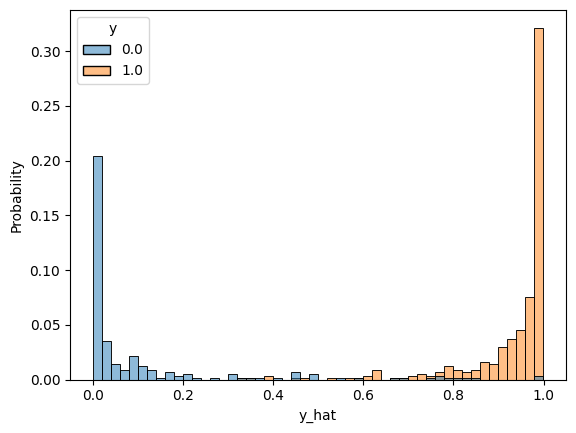

In [39]:
df = pd.DataFrame(torch.cat([y,y_hat], dim = 1).detach().numpy(),columns = ['y','y_hat'])

sns.histplot(df, x = 'y_hat', hue = 'y', bins =  50, stat = 'probability')
plt.show()

# Pytorch MNIST

In [43]:
import torch
import torch.nn as  nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [46]:
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

In [47]:
train_data = datasets.MNIST(root = './data',
                            train = True,
                            download= True,
                            transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data',
                            train = False,
                            download= True,
                            transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16232427.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 495029.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4479860.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2699522.29it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [48]:
len(train_data), len(test_data)

(60000, 10000)

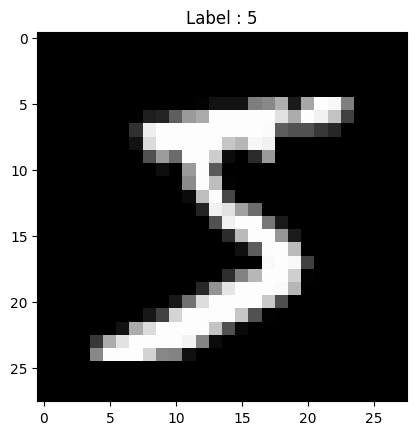

In [52]:
image, label =train_data[0]
plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title(f'Label : {label}')

plt.show();

In [53]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size = batch_size,
                                           shuffle = True)

In [54]:
first_batch = train_loader.__iter__().__next__()

In [55]:
len(train_loader)

1200

In [59]:
first_batch[0].shape

torch.Size([50, 1, 28, 28])

In [61]:
class CNN(nn.Module):

  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,32,3,1, padding = 'same')
    self.conv2 = nn.Conv2d(32,64,3,1, padding = 'same')
    self.dropout = nn.Dropout2d(0.25)
    self.fc1 = nn.Linear(3136,1000)
    self.fc2 = nn.Linear(1000,10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x,2)

    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x,2)

    x = self.dropout(x)
    x = torch.flatten(x,1)

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)

    output = F.log_softmax(x, dim = 1)

    return output

In [63]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion  = nn.CrossEntropyLoss()

In [66]:
model.train()
i = 1

for epoch in range(epoch_num):
  for data, target in train_loader:
    data = data.to(device)
    target = target.to(device)

    optimizer.zero_grad()
    output = model(data)

    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if i % 1000 == 0 :
      print(i, loss.item())

    i+=1

1000 0.05480625107884407
2000 0.25172507762908936
3000 0.024338824674487114
4000 0.09704453498125076
5000 0.013369869440793991
6000 0.009088840335607529
7000 0.028066501021385193
8000 0.01811525970697403
9000 0.019755473360419273
10000 0.01368091069161892
11000 0.014814428053796291
12000 0.013619005680084229
13000 0.001578979892656207
14000 0.002190781058743596
15000 0.0006106648361310363
16000 0.0019620046950876713
17000 0.0070536090061068535
18000 0.017633287236094475


In [68]:
model.eval()

correct = 0

for data,target in test_loader:
  data = data.to(device)
  target = target.to(device)
  output = model(data)
  pred = output.data.max(1)[1]
  correct += pred.eq(target.data).sum()

print(correct/ 10000)

tensor(0.9914, device='cuda:0')
